## Problem statement

Forecasting is an important approach to plan the future effectively and efficiently. A leading retailer in USA, wants to forecast sales for their product categories in their store based on the sales history of each category. Sales forecast has very high influence on the performance of the company’s business and hence these sales forecasts can be used to estimate company’s success or performance in the coming year. Accurate forecasts may lead to better decisions in business. Sales or revenues forecasting is very important for retail operations. Forecasting of retail sales helps retailer to take necessary measures to plan their budgets or investments in a period (monthly, yearly) among different product categories like women clothing, men clothing and other clothing and at the same time they can plan to minimize revenue loss from unavailability of products by investing accordingly.

Import libraries 

In [138]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
import seaborn as sns

2.12.0


Set seed

In [139]:
tf.random.set_seed(42)
np.random.seed(42)

Suppress scientific notation

In [140]:
pd.options.display.float_format = '{:.2f}'.format

Load files into program

In [141]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/walmart-sales-prediction-pune-march-2023/macro_economic.xlsx
/kaggle/input/walmart-sales-prediction-pune-march-2023/WeatherData.xlsx
/kaggle/input/walmart-sales-prediction-pune-march-2023/Events_HolidaysData.xlsx
/kaggle/input/walmart-sales-prediction-pune-march-2023/submission.csv
/kaggle/input/walmart-sales-prediction-pune-march-2023/attributes_description.xlsx
/kaggle/input/walmart-sales-prediction-pune-march-2023/train.csv
/kaggle/input/walmart-sales-prediction-pune-march-2023/Kaggle_Submission_Format.csv


Use pandas to read files

In [142]:
train = pd.read_csv('/kaggle/input/walmart-sales-prediction-pune-march-2023/train.csv')
test = pd.read_csv('/kaggle/input/walmart-sales-prediction-pune-march-2023/submission.csv')
kaggle_submission = pd.read_csv('/kaggle/input/walmart-sales-prediction-pune-march-2023/Kaggle_Submission_Format.csv')

In [143]:
train

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.00
1,2009,1,MenClothing,524.00
2,2009,1,OtherClothing,936.00
3,2009,2,WomenClothing,1729.00
4,2009,2,MenClothing,496.00
...,...,...,...,...
175,2013,11,MenClothing,798.00
176,2013,11,OtherClothing,1209.00
177,2013,12,WomenClothing,4865.00
178,2013,12,MenClothing,1085.00


In [144]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       180 non-null    int64  
 1   Month                      180 non-null    int64  
 2   ProductCategory            180 non-null    object 
 3   Sales(In ThousandDollars)  170 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.8+ KB


In [145]:
train.isna().sum()

Year                          0
Month                         0
ProductCategory               0
Sales(In ThousandDollars)    10
dtype: int64

In [146]:
train['Sales(In ThousandDollars)'].fillna((train['Sales(In ThousandDollars)'].mean()), inplace=True)
train

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.00
1,2009,1,MenClothing,524.00
2,2009,1,OtherClothing,936.00
3,2009,2,WomenClothing,1729.00
4,2009,2,MenClothing,496.00
...,...,...,...,...
175,2013,11,MenClothing,798.00
176,2013,11,OtherClothing,1209.00
177,2013,12,WomenClothing,4865.00
178,2013,12,MenClothing,1085.00


In [147]:
test = test.iloc[:,0:3]
test

,Year,Month,ProductCategory
0,2014,1,WomenClothing
1,2014,1,MenClothing
2,2014,1,OtherClothing
3,2014,2,WomenClothing
4,2014,2,MenClothing
5,2014,2,OtherClothing
6,2014,3,WomenClothing
7,2014,3,MenClothing
8,2014,3,OtherClothing
9,2014,4,WomenClothing


In [148]:
test.isna().sum()

Year               0
Month              0
ProductCategory    0
dtype: int64

In [149]:
kaggle_submission

,Year,Sales(In ThousandDollars)
0,1,1000
1,2,1000
2,3,1000
3,4,1000
4,5,1000
5,6,1000
6,7,1000
7,8,1000
8,9,1000
9,10,1000


Analyse train

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


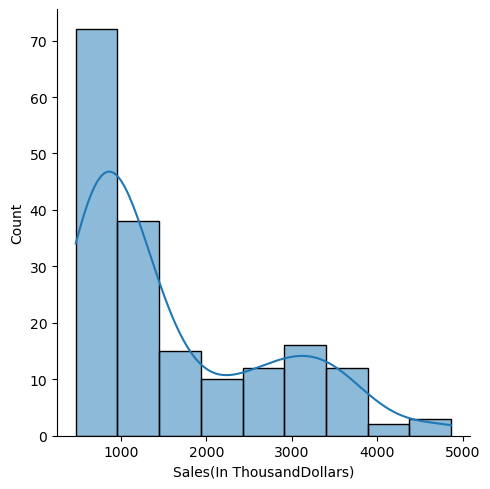

In [150]:
sns.displot(train['Sales(In ThousandDollars)'], kde=True)

<Axes: xlabel='Year', ylabel='Sales(In ThousandDollars)'>

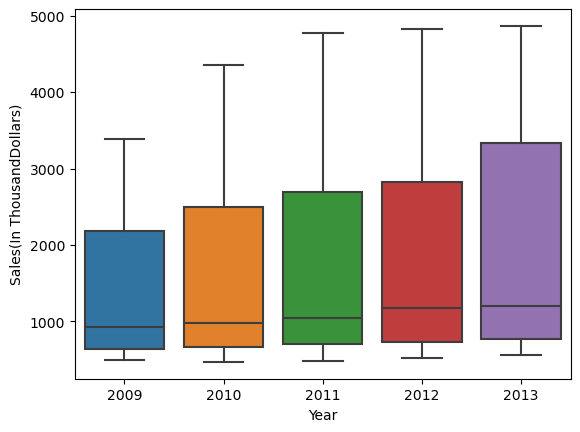

In [151]:
sns.boxplot(data=train, x="Year", y='Sales(In ThousandDollars)')

<Axes: xlabel='Month', ylabel='Sales(In ThousandDollars)'>

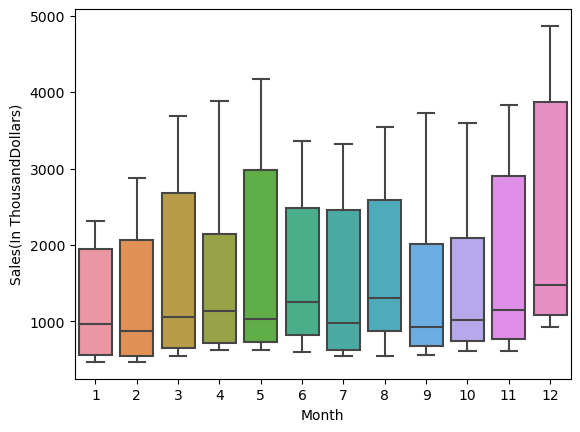

In [152]:
sns.boxplot(data=train, x="Month", y='Sales(In ThousandDollars)')

<Axes: xlabel='ProductCategory', ylabel='Sales(In ThousandDollars)'>

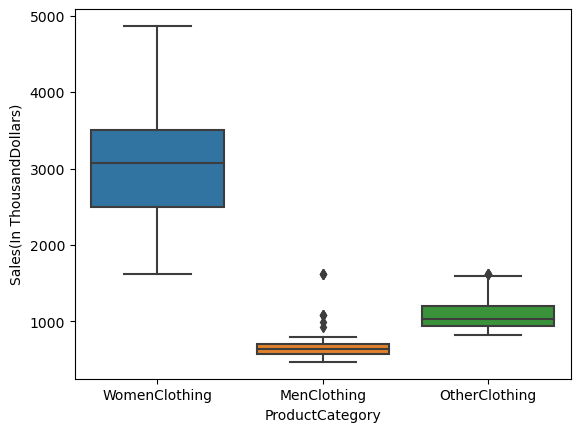

In [153]:
sns.boxplot(data=train, x="ProductCategory", y='Sales(In ThousandDollars)')

Encode product category

In [154]:
cat = {'WomenClothing': 1, 'MenClothing':2, 'OtherClothing':3}
       
train.replace({"ProductCategory": cat}, inplace=True)
test.replace({"ProductCategory": cat}, inplace=True)

train

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,1,1755.00
1,2009,1,2,524.00
2,2009,1,3,936.00
3,2009,2,1,1729.00
4,2009,2,2,496.00
...,...,...,...,...
175,2013,11,2,798.00
176,2013,11,3,1209.00
177,2013,12,1,4865.00
178,2013,12,2,1085.00


Yearly increment

In [155]:
train_pct_chg = train.groupby(['Year', 'Month', 'ProductCategory']).sum().groupby(['Year', 'ProductCategory']).pct_change()
train_pct_chg.fillna(0, inplace=True)
train_pct_chg

Sales(In ThousandDollars)
Year Month ProductCategory                           
2009 1     1                                     0.00
           2                                     0.00
           3                                     0.00
     2     1                                    -0.01
           2                                    -0.05
...                                               ...
2013 11    2                                     0.02
           3                                    -0.25
     12    1                                     0.27
           2                                     0.36
           3                                     0.30

[180 rows x 1 columns]

In [156]:
growth = train_pct_chg['Sales(In ThousandDollars)'].values
growth

array([ 0.        ,  0.        ,  0.        , -0.01481481, -0.05343511,
       -0.08226496,  0.30480046,  0.09274194,  0.07217695,  0.17996454,
        0.23431734, -0.00760043,  0.02629602, -0.0284006 ,  0.08205689,
       -0.18740849, -0.06615385, -0.05763397, -0.02522523, -0.05271829,
       -0.0332618 ,  0.09565619, -0.04173913, -0.0399556 ,  0.02108815,
        0.0508167 , -0.05317919,  0.06526229,  0.05354059,  0.11599512,
       -0.02248934,  0.01639344,  0.04485777,  0.34470448,  0.5       ,
        0.41465969,  0.        ,  0.        ,  0.        ,  0.12651727,
       -0.0105042 , -0.08042328,  0.28553668,  0.2059448 ,  0.08285386,
       -0.47881063,  0.10915493,  0.71809714,  0.99229381, -0.0047619 ,
       -0.3870341 , -0.1443651 , -0.04625199, -0.00706357, -0.00253991,
       -0.090301  , -0.04776423,  0.02109858,  1.97192907, -0.04268943,
        0.03990025, -0.65176609, -0.06465998,  0.05207263,  0.12611012,
        0.10846246,  0.0667535 ,  0.05520505,  0.11290323,  0.33

In [157]:
train['Growth'] = growth
train

,Year,Month,ProductCategory,Sales(In ThousandDollars),Growth
0,2009,1,1,1755.00,0.00
1,2009,1,2,524.00,0.00
2,2009,1,3,936.00,0.00
3,2009,2,1,1729.00,-0.01
4,2009,2,2,496.00,-0.05
...,...,...,...,...,...
175,2013,11,2,798.00,0.02
176,2013,11,3,1209.00,-0.25
177,2013,12,1,4865.00,0.27
178,2013,12,2,1085.00,0.36


In [158]:
test_growth = train['Growth'].iloc[-36:].values
test_growth

array([ 0.        ,  0.        ,  0.        ,  0.23793103, -0.06510851,
        0.1042471 ,  0.28377437,  0.21785714,  0.17657343,  0.05315975,
        0.05278592, -0.11738484,  0.07391192,  0.04317549,  0.00505051,
       -0.1942446 , -0.09479306,  0.0561139 , -0.01190476, -0.04424779,
       -0.10705789,  0.06596386,  0.06018519,  0.1642984 ,  0.05114439,
       -0.00873362, -0.2044241 , -0.03494624,  0.15271659,  0.55007614,
        0.06796657,  0.01656051, -0.25219397,  0.26890975,  0.35964912,
        0.29528536])

In [159]:
test['Growth'] = test_growth
test

,Year,Month,ProductCategory,Growth
0,2014,1,1,0.00
1,2014,1,2,0.00
2,2014,1,3,0.00
3,2014,2,1,0.24
4,2014,2,2,-0.07
5,2014,2,3,0.10
6,2014,3,1,0.28
7,2014,3,2,0.22
8,2014,3,3,0.18
9,2014,4,1,0.05


Define X and y variables

In [160]:
y = train.pop('Sales(In ThousandDollars)')
X = train
X_test = test

In [161]:
X.isna().sum()

Year               0
Month              0
ProductCategory    0
Growth             0
dtype: int64

In [162]:
X

,Year,Month,ProductCategory,Growth
0,2009,1,1,0.00
1,2009,1,2,0.00
2,2009,1,3,0.00
3,2009,2,1,-0.01
4,2009,2,2,-0.05
...,...,...,...,...
175,2013,11,2,0.02
176,2013,11,3,-0.25
177,2013,12,1,0.27
178,2013,12,2,0.36


In [163]:
X_test['Year'] = 2014
X_test.isna().sum()

Year               0
Month              0
ProductCategory    0
Growth             0
dtype: int64

In [164]:
X_test

,Year,Month,ProductCategory,Growth
0,2014,1,1,0.00
1,2014,1,2,0.00
2,2014,1,3,0.00
3,2014,2,1,0.24
4,2014,2,2,-0.07
5,2014,2,3,0.10
6,2014,3,1,0.28
7,2014,3,2,0.22
8,2014,3,3,0.18
9,2014,4,1,0.05


Split the X and y variables into train and validation sets

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)
X_train.shape, X_val.shape, y_train.shape,y_val.shape, X_test.shape

((162, 4), (18, 4), (162,), (18,), (36, 4))

Random Forest 

In [166]:
from sklearn.ensemble import RandomForestRegressor

rfr1 = RandomForestRegressor().fit(X_train, y_train)
print(rfr1.score(X_train, y_train))

0.9957221172084064


In [167]:
ypred_rf = rfr1.predict(X_val)
ypred_rf = abs(ypred_rf)
ypred_rf

array([1113.91      ,  545.88      , 2155.67952941, 1189.56      ,
       1335.32376471, 2722.49      , 3795.53      ,  573.86      ,
       1097.29      ,  658.85      , 1268.43364706, 1363.95105882,
        944.86      , 2305.74      ,  513.51      ,  676.46      ,
        933.3       , 3391.39      ])

In [168]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_val, ypred_rf))
rmse

223.01603593509566

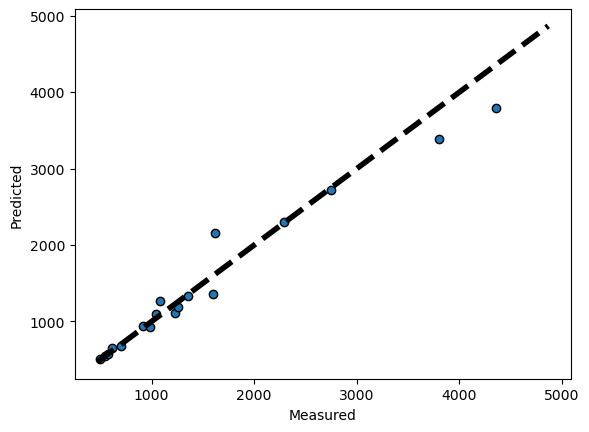

In [169]:
fig, ax = plt.subplots()
ax.scatter(y_val, ypred_rf, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [170]:
df_val=pd.DataFrame({'actual_value': y_val.ravel(), 'predicted_value':ypred_rf.ravel()})
df_val

,actual_value,predicted_value
0,1229.00,1113.91
1,545.00,545.88
2,1616.73,2155.68
3,1261.00,1189.56
4,1351.00,1335.32
5,2749.00,2722.49
6,4360.00,3795.53
7,575.00,573.86
8,1039.00,1097.29
9,613.00,658.85


Predict on test set

In [171]:
pred = rfr1.predict(X_test)
pred = abs(pred)
pred

array([2427.45      ,  581.94      , 1099.54      , 2937.65      ,
        565.98      , 1154.27      , 3713.55      ,  674.85      ,
       1314.57729412, 3776.22      ,  712.87      , 1166.71      ,
       3975.18      ,  735.04      , 1164.93      , 3341.8       ,
        680.28      , 1189.56      , 3355.75      ,  658.81      ,
       1123.1       , 3633.62      ,  694.11      , 1306.49      ,
       3679.88      ,  681.35      , 1074.2       , 3512.78      ,
        753.52      , 1606.66105882, 3770.        ,  769.8       ,
       1174.44      , 4718.89      , 1096.19      , 1502.78729412])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


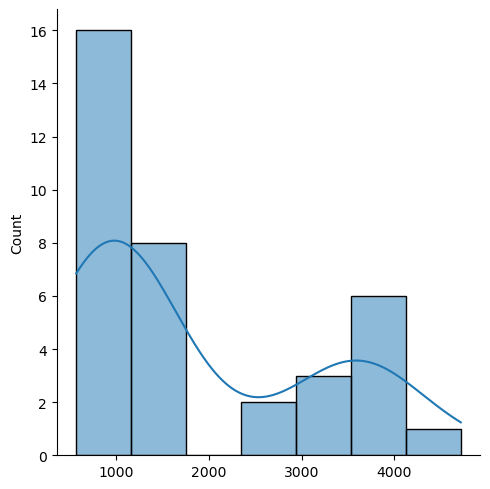

In [172]:
sns.displot(pred, kde=True)

Prepare test dataset

In [173]:
test['Sales(In ThousandDollars)'] = pred
test

,Year,Month,ProductCategory,Growth,Sales(In ThousandDollars)
0,2014,1,1,0.00,2427.45
1,2014,1,2,0.00,581.94
2,2014,1,3,0.00,1099.54
3,2014,2,1,0.24,2937.65
4,2014,2,2,-0.07,565.98
5,2014,2,3,0.10,1154.27
6,2014,3,1,0.28,3713.55
7,2014,3,2,0.22,674.85
8,2014,3,3,0.18,1314.58
9,2014,4,1,0.05,3776.22


In [174]:
test_cat = test.groupby('Month').agg({'Sales(In ThousandDollars)':'sum'})
test_cat

,Sales(In ThousandDollars)
Month,
1,4108.93
2,4657.90
3,5702.98
4,5655.80
5,5875.15
6,5211.64
7,5137.66
8,5634.22
9,5435.43


Prepare submission

In [175]:
kaggle_submission['Sales(In ThousandDollars)'] = pred
kaggle_submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission

,Year,Sales(In ThousandDollars)
0,1,2427.45
1,2,581.94
2,3,1099.54
3,4,2937.65
4,5,565.98
5,6,1154.27
6,7,3713.55
7,8,674.85
8,9,1314.58
9,10,3776.22
